In [1]:
# Imports and Data Loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [2]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
# Predict on test set
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])


Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


In [4]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


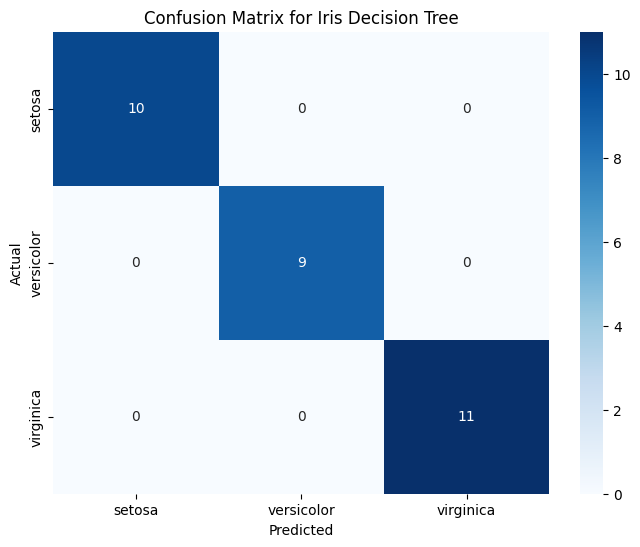

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
          xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Iris Decision Tree")
os.makedirs("outputs", exist_ok=True) 
plt.savefig("outputs/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

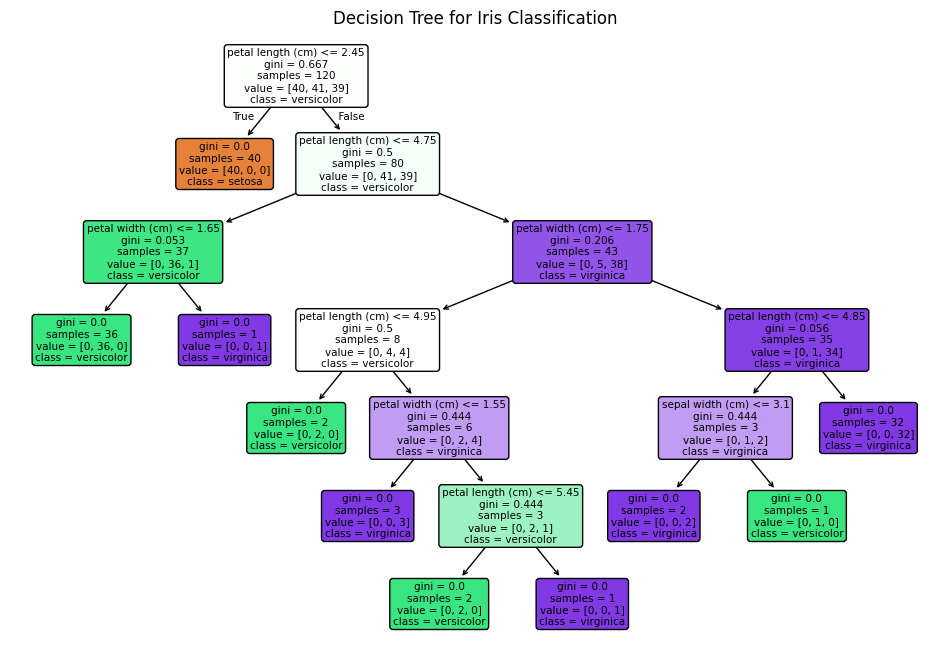

In [9]:
# Visualizing Decision Tree
plt.figure(figsize=(12, 8))  
plot_tree(model, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree for Iris Classification")
plt.savefig("outputs/decision_tree.png", dpi=300, bbox_inches="tight")  
plt.show()

In [8]:
# Features importance analysis

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame 
feature_importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


Results


The Decision Tree Classifier, trained on the Iris dataset with random_state=42, achieved a perfect test accuracy of 1.00 (30/30 samples correctly classified). The confusion matrix shows:

Setosa: 10/10 correctly classified.
 Setosa is easily separated due to its distinct petal length (< 2.5 cm). The decision tree’s root split (seen via plot_tree) likely used “petal length <= 2.45 cm” to isolate Setosa perfectly.

Versicolor :9/9
Versicolor’s petal length (3.0–5.1 cm) and petal width (1.0–1.8 cm) effectively distinguish it from other species, as confirmed by feature importance analysis, where petal length contributes ~90.6% and petal width ~7.7% to the Decision Tree Classifier’s decisions.

Virginica:11/11
 Virginica’s larger petal measurements (4.5–6.9 cm) make it distinct, especially after Setosa is separated.